# Project 2: Regression for Prediction Problems

Team members: Hero Ashman, Madeleine Parker, Elleni Hailu, Yael Nidam.

In this report we use data from the CDC and the American Community Survey to predict diabetes rates at the county level. This report should inform decisions about where to target a pilot diabetes prevention program. 

## 1. Exploratory Data Analysis
Our data set is a combination of variables from the CDC and the ACS at the county level. We have information from 3220 counties. Variables include the population counts of people with diabetes, who are obese, and who are physically inactive, and population counts of people by race, ethnicity, age, and sex. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

np.random.seed(10)

In [21]:
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv")
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [3]:
# number of rows 
len(diabetes)

3220

In [4]:
#View all column names
cols = diabetes.columns.tolist()
#cols

In [22]:
# list of variable names (long)
#list(diabetes.columns.values)

# type of the three variables we are concerned are strings
diabetes.dtypes[3:6]


Diabetes_Number               object
Obesity_Number                object
Physical_Inactivity_Number    object
dtype: object

**Data Cleaning**

While the population counts are all numeric, as expected, the counts for diabetes, people who are obese, and people who are inactive are strings. Some of these columns contain missing data, which is recorded as the string "No Data". We convert these columns to floats, coercing any rows with non-numeric strings in to NaN.  There is 1 row with missing diabetes counts. There are 78 rows with missing counts for Physically Inactive and Obese. 

In [29]:
diabetes['Diabetes_Number'] = pd.to_numeric(arg=diabetes['Diabetes_Number'], errors='coerce')
diabetes['Obesity_Number'] = pd.to_numeric(arg=diabetes['Obesity_Number'], errors='coerce')
diabetes['Physical_Inactivity_Number'] = pd.to_numeric(arg=diabetes['Physical_Inactivity_Number'], errors='coerce')

diabetes.dtypes[3:6]


Diabetes_Number               float64
Obesity_Number                float64
Physical_Inactivity_Number    float64
dtype: object

In [33]:
# missing counts for key variables
diabetes.isnull().sum()[3:6]

Diabetes_Number                1
Obesity_Number                78
Physical_Inactivity_Number    78
dtype: int64

**Distribution of Diabetes Cases** 

We start our report with some descriptive plots. Our goal here is to explore variation in diabetes numbers across counties. We also look at a couple of predictors that we suspect might be important for prediction later on.  

We plot a histogram of diabetes cases as the county level. We plot this both as number of cases and as number of cases per 100 people, as the counties vary in population size. 

In [34]:
# calculate diabetes cases per 100 people
diabetes['diabetes_per100'] = diabetes['Diabetes_Number']/diabetes['race_total population']*100


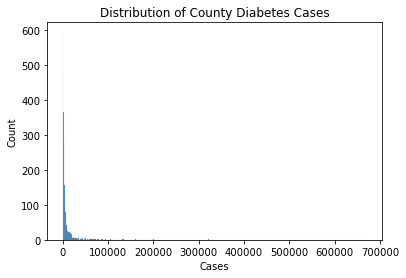

In [35]:
#diabetes cases across counties
sns.histplot(data = diabetes, x = 'Diabetes_Number')
plt.title("Distribution of County Diabetes Cases")
plt.xlabel("Cases");

The plot above shows that the distribution of cases across counties is extremely right skewed, likely driven by counties with very large populations. Logging the case numbers makes the distribution easier to see. 

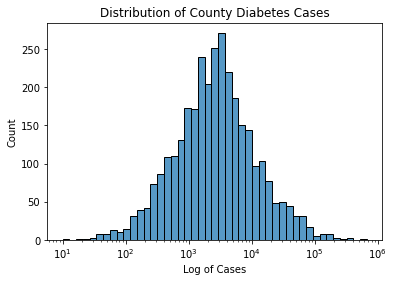

In [36]:
sns.histplot(data = diabetes, x = 'Diabetes_Number', log_scale= True)
plt.title("Distribution of County Diabetes Cases")
plt.xlabel("Log of Cases");

The plot below shows that the percentage of people with diabetes is roughly normally distributed across counties, with a mean around 20%. This is twice as high as the percentage of the population with diabetes reported by the [American Diabetes Association](https://www.diabetes.org/resources/statistics/statistics-about-diabetes), which puts the figure at around 10%. 

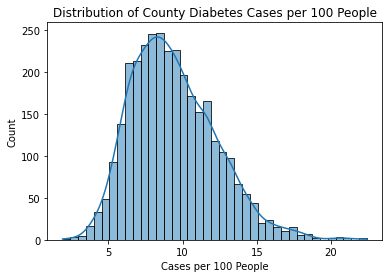

In [37]:
# diabetes per 100 people
sns.histplot(data = diabetes, x = 'diabetes_per100', kde = True)
plt.title("Distribution of County Diabetes Cases per 100 People")
plt.xlabel("Cases per 100 People");

**Diabetes and Level of Inactivity**

We suspect there might be a relationship between diabetes and level of inactivity. To explore this, we plot the linear regression line of physical inactivity on diabetes cases, at the county level. We first log both numbers. The plot below also includes a scatter plot of the underlying data. There is a strong linear relationship between number of diabetes cases and number of people who are physically inactive. 

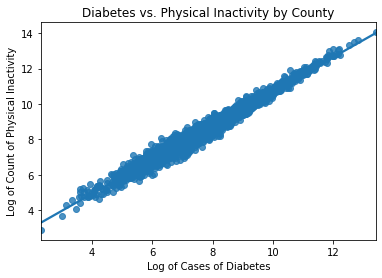

In [38]:
# take log of both numbers
diabetes['ln_inactive'] = np.log(diabetes["Physical_Inactivity_Number"])
diabetes['ln_diabetes'] = np.log(diabetes["Diabetes_Number"])

sns.regplot(data = diabetes, x = 'ln_diabetes', y = 'ln_inactive', scatter = True)
plt.title("Diabetes vs. Physical Inactivity by County")
plt.xlabel("Log of Cases of Diabetes")
plt.ylabel("Log of Count of Physical Inactivity");

**Diabetes and Demographic Characteristics**

Our data contains county population counts by sex, race, and age (and interactions of all three). It is possible that upstream social factors that vary by gender, such as diet or activity levels, impact rates of diabetes. Although we do not observe the rates of diabetes differentially for men and women (the only genders reported in the ACS), we can see if counties with a higher male to female ratio have higher or lower rates of diabetes. For this, we create a dummy variable indicating if a county has more or equal number of women than men (female_cnty). We then plot a box-and-whisker diagram of cases per 100 people for the two types of county.

The plot below shows that for counties with equal or higher numbers of women than men, their rate of diabetes is slightly higher (orange plot). However, there is not a large difference and it may not be significant.  


In [39]:
# dummy for a county having more or equal number of women to men
diabetes['female_cnty'] = 1*(diabetes['sex and age_total population_sex ratio (males per 100 females)'] <=100) \
+ 0*(diabetes['sex and age_total population_sex ratio (males per 100 females)'] > 100)
#diabetes['female_cnty']

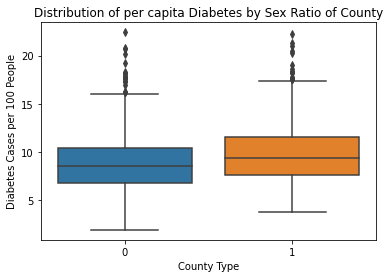

In [40]:
sns.boxplot(data = diabetes, x = 'female_cnty', y = 'diabetes_per100')
plt.title('Distribution of per capita Diabetes by Sex Ratio of County')
plt.xlabel('County Type')
plt.ylabel('Diabetes Cases per 100 People');

## 2. Prepare to Fit Models

In this next section we